# Basic OpenCV in Colab
**By pranpaveen Lay.**

# Download resource

In [ ]:
!gdown --id 16W8SKaRKyubcIZRXR5KY_HaxvJjFHM3_
!unzip -q source.zip

Downloading...
From: https://drive.google.com/uc?id=16W8SKaRKyubcIZRXR5KY_HaxvJjFHM3_
To: /content/source.zip
100% 69.1M/69.1M [00:00<00:00, 136MB/s]


# Import OpenCV

In [ ]:
import cv2

# Read Image & Show Image

In [ ]:
img = cv2.imread('source/cat1.jpeg')

In [ ]:
#cv2.imshow('img',img)

**Error  cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash**  

consider using
```
from google.colab.patches import cv2_imshow
```



In [ ]:
from google.colab.patches import cv2_imshow

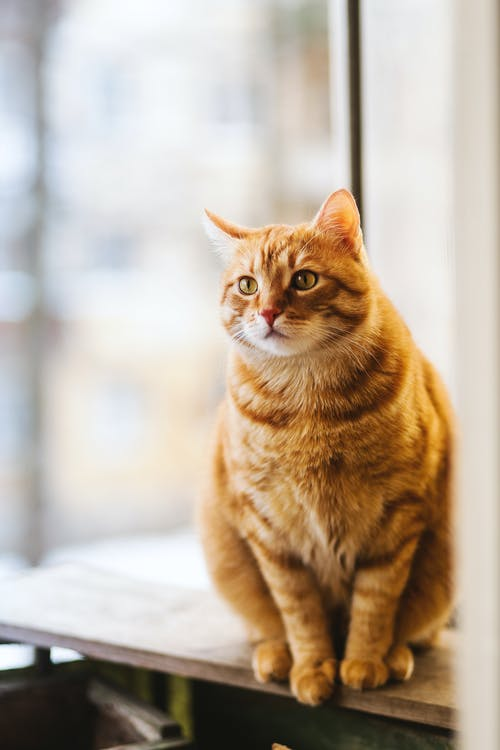

In [ ]:
img = cv2.imread('source/cat1.jpeg')
cv2_imshow(img)

In [ ]:
img.shape,img.dtype

((750, 500, 3), dtype('uint8'))

## Show image with matplotlib

In [ ]:
from matplotlib import pyplot as plt

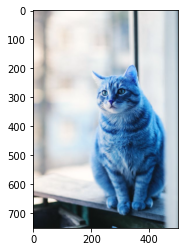

In [ ]:
plt.imshow(img)

**OpenCV read image as BGR but plt.imshow show image in RGB**

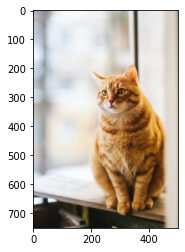

In [ ]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

## Save image

In [ ]:
cv2.imwrite('cat_write.png',img_RGB)

True

In [ ]:
!ls  | grep cat_write

cat_write.png


# Read Video

In [ ]:
video = cv2.VideoCapture('source/cat_trim.mp4')
while True:
    ret, frame = video.read()
    if not ret:
        break
    # Do somethings ...

## Play video

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('source/cat_trim.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

## Save Video

In [ ]:
video = cv2.VideoCapture('source/cat_trim.mp4')
vid_width = int(video.get(3))
vid_height = int(video.get(4))
fps = video.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
out = cv2.VideoWriter('cat_gray.mp4', 
                       fourcc,
                       fps,(vid_width,vid_height))


while True:
    ret, frame = video.read()
    if not ret:
        break
    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.cvtColor(frame_gray,cv2.COLOR_GRAY2BGR)
    out.write(frame_gray)

video.release()
out.release()

In [ ]:
!ls -lah | grep cat_gray

In [ ]:
!ffmpeg -i cat_gray.mp4 cat_gray2.mp4

In [ ]:
#!ffmpeg -i cat_gray.avi cat_gray.mp4

from IPython.display import HTML
from base64 import b64encode

mp4 = open('cat_gray2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Image Resize

In [ ]:
img.shape

In [ ]:
cv2_imshow(img)

In [ ]:
img2 = cv2.resize(img, (500,500))
cv2_imshow(img2)

In [ ]:
img2.shape

## Rescale

In [ ]:
def rescale(image,scale=0.5):
    width = int(image.shape[1]*scale)
    height = int(image.shape[0]*scale)
    return cv2.resize(img,(width,height))

In [ ]:
img3 = rescale(img,0.5)
print(img3.shape)
cv2_imshow(img3)

In [ ]:
ori_img = img.copy()

# Drawing shape

In [ ]:
import numpy as np

In [ ]:
plane = np.zeros((500,500,3),dtype=np.uint8)

In [ ]:
cv2_imshow(plane)

## Color channels

In [ ]:
plane[300:,300:,:] = 255
cv2_imshow(plane)

In [ ]:
plane[100:200,100:200,0] = 255
cv2_imshow(plane)

In [ ]:
plane[100:200,200:300,1] = 255
cv2_imshow(plane)

In [ ]:
plane[100:200,300:400,2] = 255
cv2_imshow(plane)

In [ ]:
plane[100:200,400:500,1:] = 255
cv2_imshow(plane)

In [ ]:
plane[0:100,400:500,0] = 255
plane[0:100,400:500,2] = 128
cv2_imshow(plane)

In [ ]:
plane[0:100,400:500,0] = 128
plane[0:100,400:500,2] = 255
cv2_imshow(plane)

## Draw Rectangle

In [ ]:
plane = np.zeros((500,500,3),dtype=np.uint8)

In [ ]:
cv2.rectangle(plane,(0,0),(200,300),(255,128,128),thickness=2)
cv2_imshow(plane)

In [ ]:
cv2.rectangle(plane,(100,100),(200,300),(0,0,255),thickness=-1)
cv2_imshow(plane)

## Draw Circle

In [ ]:
cv2.circle(plane, 
           center = (plane.shape[1]//2,plane.shape[0]//2),
           radius=50, color=(0,255,0), thickness=5
           )
cv2_imshow(plane)

## Draw Line

In [ ]:
cv2.line(plane,(0,0),(300,300),(255,255,0), thickness=4)
cv2_imshow(plane)

## Write Text

In [ ]:
cv2.putText(plane, "HELLO World", (100,400),
            cv2.FONT_ITALIC, 4,(255,255,255), thickness=3)
cv2_imshow(plane)

In [ ]:
cv2.putText(plane, "HELLO World", (10,500),
            cv2.FONT_HERSHEY_DUPLEX, 2,(255,255,255), thickness=3)
cv2_imshow(plane)

# Color Detection

In [ ]:
img = cv2.imread('source/colorwheel.png')
cv2_imshow(img)

In [ ]:
img.shape

In [ ]:
img_temp = img.copy()
img_temp[:,:,0] = 0
img_temp[:,:,1] = 0
cv2_imshow(img_temp)

In [ ]:
plt.gray()
plt.imshow(img[:,:,0])
plt.figure()
plt.imshow(img[:,:,1])
plt.figure()
plt.imshow(img[:,:,2])

Use HSV color space
![hsv](https://miro.medium.com/max/1400/1*W30TLUP9avQwyyLfwu7WYA.jpeg)
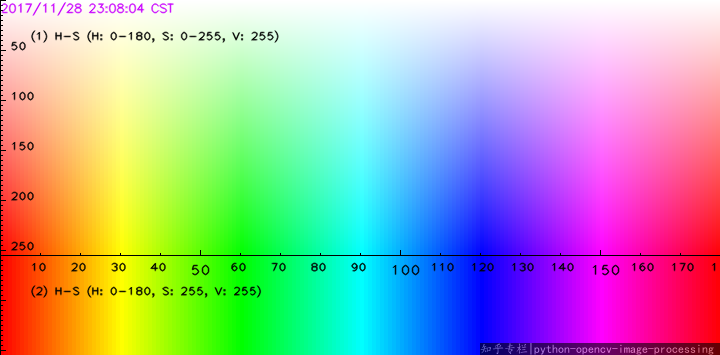

In [ ]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [ ]:
img_hsv.shape

In [ ]:
lower = np.array([110,50,50])
upper = np.array([130,255,255])

In [ ]:
mask = cv2.inRange(img_hsv,lower,upper)

In [ ]:
cv2_imshow(mask)

In [ ]:
cv2_imshow(cv2.bitwise_and(img,img,mask=mask))

In [ ]:
lower1 = np.array([0,50,50])
upper1 = np.array([10,255,255])
mask1 = cv2.inRange(img_hsv,lower1,upper1)

lower2 = np.array([170,50,50])
upper2 = np.array([180,255,255])
mask2 = cv2.inRange(img_hsv,lower2,upper2)

mask = cv2.bitwise_or(mask1,mask2)

cv2_imshow(cv2.bitwise_and(img,img,mask=mask))

# Morphological

In [ ]:
img = cv2.imread('source/cat1.jpeg')
cv2_imshow(img)

In [ ]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [ ]:
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [ ]:
lower = np.array([10,75,75])
upper = np.array([20,255,255])

In [ ]:
mask = cv2.inRange(img_hsv,lower,upper)

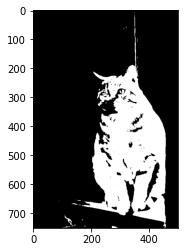

In [ ]:
plt.imshow(mask)

## erode

In [ ]:
kernel = np.ones((3,3))
mask_ero = cv2.erode(mask,kernel)

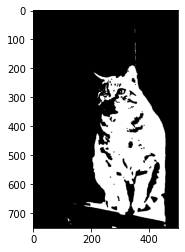

In [ ]:
plt.imshow(mask_ero)

## dilate

In [ ]:
kernel = np.ones((5,5))
mask_dil = cv2.dilate(mask,kernel)

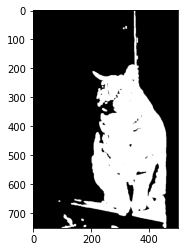

In [ ]:
plt.imshow(mask_dil)

In [ ]:
kernel = np.ones((5,5))
mask_dil = cv2.dilate(mask,kernel,iterations=3)

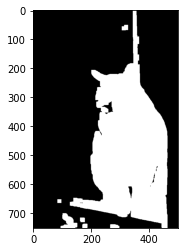

In [ ]:
plt.imshow(mask_dil)

In [ ]:
mask_mo = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel,iterations=3)

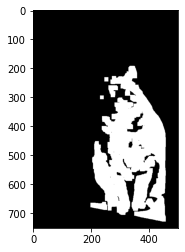

In [ ]:
plt.imshow(mask_mo)

In [ ]:
kernel = np.ones((5,5))
mask_ero2 = cv2.erode(mask,kernel)
mask_dil2 = cv2.dilate(mask_ero2,kernel,iterations=5)

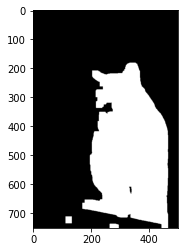

In [ ]:
plt.imshow(mask_dil2)

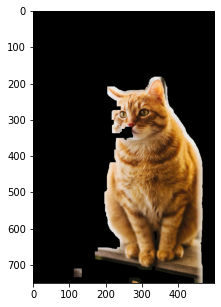

In [ ]:
cv2_imshow(cv2.bitwise_and(img,img,mask=mask_dil2))

# Find contours

In [ ]:
contours, hierarchy = cv2.findContours(mask_dil2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
image = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

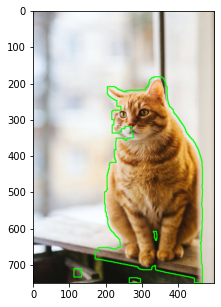

In [ ]:
cv2_imshow(image)

In [ ]:
len(contours)

4

In [ ]:
contours[2].shape

(511, 1, 2)

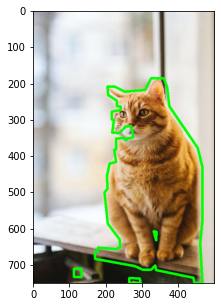

In [ ]:
contour_dp = [cv2.approxPolyDP(cnt,4,True) for cnt in contours]
image2 = img.copy()
cv2.drawContours(image2, contour_dp, -1, (0, 255, 0), 5)
cv2_imshow(image2)

In [ ]:
contour_dp[2].shape

(52, 1, 2)

In [ ]:
image2 = img.copy()
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image2, [hull], 0, (0, 255, 0), 5)

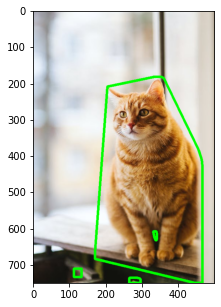

In [ ]:
cv2_imshow(image2)

In [ ]:
[cv2.contourArea(c) for c in contours]

[415.5, 483.0, 116162.0, 153.0]

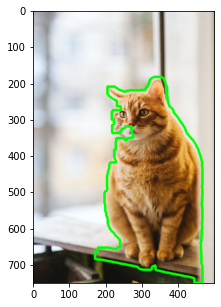

In [ ]:
max_con = contours[np.argmax([cv2.contourArea(c) for c in contours])]
image3 = img.copy()
cv2.drawContours(image3, [max_con], 0, (0, 255, 0), 5)
cv2_imshow(image3)

# Edge detection + Contour

In [ ]:
img_blur = cv2.GaussianBlur(img,(11,11),0,0)

In [ ]:
edge = cv2.Canny(img, 100, 100)

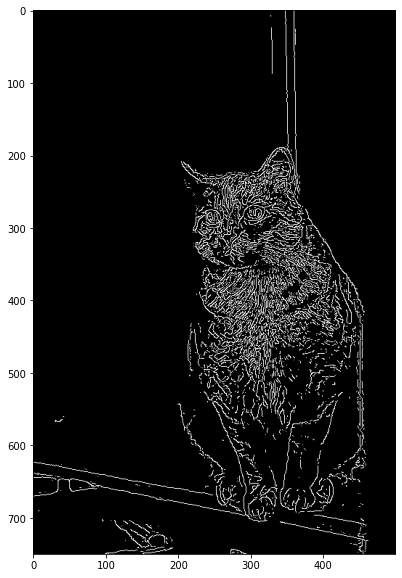

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(edge)

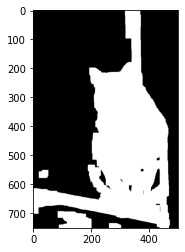

In [ ]:
kernel = np.ones((5,5))
edge_dil = cv2.dilate(edge,kernel, iterations=5)
plt.imshow(edge_dil)

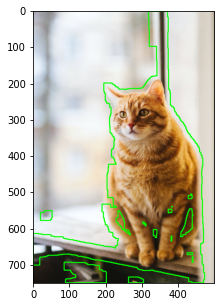

In [ ]:
contours, hierarchy = cv2.findContours(edge_dil, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)
cv2_imshow(image)

In [ ]:
len(contours)

16

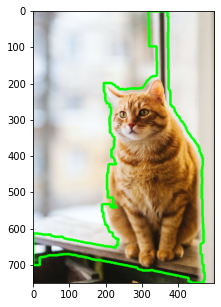

In [ ]:
max_con = contours[np.argmax([cv2.contourArea(c) for c in contours])]
image2 = img.copy()
cv2.drawContours(image2, [max_con], 0, (0, 255, 0), 5)
cv2_imshow(image2)

In [ ]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

# Background Subtraction

## Frame diff

In [ ]:
cap = cv2.VideoCapture('source/cctv.mp4')

vid_width = int(cap.get(3))
vid_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
out2 = cv2.VideoWriter('cctv_bgsub_1.mp4', 
                       fourcc,
                       fps,(vid_width,vid_height))

buffer = None
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if buffer is not None:
        diff = np.mean(cv2.absdiff(frame, buffer), axis=2)
        fg = np.uint8((diff > 0.5*np.max(diff)) * 255)
        # cv2.imshow('diff', np.uint8(diff / np.max(diff) * 255))
        # cv2.imshow('fg', fg)
        out2.write(cv2.cvtColor(fg,cv2.COLOR_GRAY2BGR))
    buffer = frame
    
cap.release()
out2.release()


1080 1920 25.0


In [ ]:
!ffmpeg -i cctv_bgsub_1.mp4 ccctv_bgsub_1_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
mp4 = open('ccctv_bgsub_1_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

## MOG&KNN subtractor

In [ ]:
cap = cv2.VideoCapture('source/cctv.mp4')

vid_width = int(cap.get(3))
vid_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
out2 = cv2.VideoWriter('cctv_bgsub_2.mp4', 
                       fourcc,
                       fps,(vid_width,vid_height))

bgsubknn = cv2.createBackgroundSubtractorKNN()
bgsubmog = cv2.createBackgroundSubtractorMOG2()
while True:
    ret, frame = cap.read()
    if not ret:
        break
    fgknn = bgsubknn.apply(frame)
    #fgmog = bgsubmog.apply(frame)
    out2.write(cv2.cvtColor(fgknn,cv2.COLOR_GRAY2BGR))
    #cv2.imshow('bw',cv2.bitwise_and(frame,frame,mask=fgknn))

out2.release()
cap.release()

1080 1920 25.0


In [ ]:
!ffmpeg -i cctv_bgsub_2.mp4 cctv_bgsub_2_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
mp4 = open('cctv_bgsub_2_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=600 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
cap = cv2.VideoCapture('source/cctv.mp4')

vid_width = int(cap.get(3))
vid_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
print(vid_height,vid_width,fps)
fourcc = cv2.VideoWriter_fourcc(*'mp4v') #*avc1
out = cv2.VideoWriter('cctv_linesensor.mp4', 
                       fourcc,
                       fps,(vid_width,vid_height))

L1 = np.r_[100:120]
bgsub = cv2.createBackgroundSubtractorKNN()
count = -1
status = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    ROI = frame[800:850, 500:1900 , :]
    gray = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)
    fg = bgsub.apply(gray)
    #print(np.sum(fg),status)
    if np.sum(fg) > 100:
        ROI[:,:,:2] = 0
        if status == 0:
            count += 1
        status = 1
    else:
        ROI[:, :, 1:] = 0
        status = 0
    cv2.putText(frame,str(count),(500,800),cv2.FONT_HERSHEY_PLAIN,3,(0,100,200),4)
    out.write(frame)

cap.release()
out.release()
    

1080 1920 25.0


In [ ]:
!ffmpeg -i cctv_linesensor.mp4 cctv_linesensor_coded.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
mp4 = open('cctv_linesensor_coded.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)